In [7]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np


In [8]:
url = "https://www.vogue.com/search?q=GUCCI+2023&sort=score+desc"
response = requests.get(url)

In [9]:
print(response)

<Response [200]>


In [10]:
html = response.content

In [11]:
soup = bs(html, "lxml")

In [12]:
print(soup)

<!DOCTYPE html>
<html data-reactroot="" lang="en-US"><head><title>Search | Vogue</title><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="no" name="msapplication-tap-highlight"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="no-referrer-when-downgrade" name="referrer"/><meta content="Condé Nast" name="author"/><meta content="Copyright (c) Condé Nast 2023" name="copyright"/><meta content="Search" name="description"/><meta name="id"/><meta content="" name="keywords"/><meta content="" name="news_keywords"/><meta content="index, follow, max-image-preview:large" name="robots"/><meta content="search" name="content-type"/><meta name="parsely-post-id"/><meta content='{"description":"Search"}' name="parsely-metadata"/><meta content="" property="og:description"/><meta content="https://www.vogue.com/verso/static/vogue/assets/logo-seo.8711c93f21c17e155deb3621d707d7a1080c94db.png" property="og:image"/><meta content="Vogu

In [13]:
soup.h1.get_text()

'Search stories from Vogue'

In [14]:
h1_tags = soup.find_all('h1')
second_h1 = h1_tags[1].get_text()
second_h1

'6,987 stories about "GUCCI 2023"'

In [15]:
print(type(second_h1))

<class 'str'>


In [16]:
second_h1.split()

['6,987', 'stories', 'about', '"GUCCI', '2023"']

In [17]:

data = {
    'Number of news': [6956, 6608, 7459, 5532, 5102],
    'Column 2': ['GUCCI', 'DIOR', 'CHANEL', 'PRADA', 'VERSACE'],
    'year': [2023, 2023, 2023, 2023, 2023]
}

df_news = pd.DataFrame(data)

In [18]:
df_news

,Number of news,Column 2,year
0,6956,GUCCI,2023
1,6608,DIOR,2023
2,7459,CHANEL,2023
3,5532,PRADA,2023
4,5102,VERSACE,2023


In [92]:
df_geo_1 = pd.read_csv('/Users/josezambrano/Desktop/EDA /Trends/geoMap (2).csv')

df_geo_1 

,Country,Chanel: (12/13/22 - 3/13/23),Gucci: (12/13/22 - 3/13/23),versace: (12/13/22 - 3/13/23),Prada: (12/13/22 - 3/13/23),Dior: (12/13/22 - 3/13/23)
0,Hong Kong,43%,19%,1%,8%,29%
1,British Virgin Islands,NaN,NaN,NaN,NaN,NaN
2,Macao,NaN,NaN,NaN,NaN,NaN
3,Equatorial Guinea,NaN,NaN,NaN,NaN,NaN
4,Singapore,32%,19%,4%,10%,35%
...,...,...,...,...,...,...
245,Tuvalu,NaN,NaN,NaN,NaN,NaN
246,U.S. Outlying Islands,NaN,NaN,NaN,NaN,NaN
247,Vatican City,NaN,NaN,NaN,NaN,NaN
248,Vanuatu,NaN,NaN,NaN,NaN,NaN


In [108]:
new_dfgeo=df_geo_1.dropna()
new_dfgeo.head()

,Country,Chanel: (12/13/22 - 3/13/23),Gucci: (12/13/22 - 3/13/23),versace: (12/13/22 - 3/13/23),Prada: (12/13/22 - 3/13/23),Dior: (12/13/22 - 3/13/23)
0,Hong Kong,43%,19%,1%,8%,29%
4,Singapore,32%,19%,4%,10%,35%
7,United Arab Emirates,19%,23%,10%,10%,38%
10,Taiwan,45%,22%,1%,8%,24%
13,France,24%,19%,6%,11%,40%


In [109]:
df = new_dfgeo.replace('%', '', regex=True)
df.head(2)

,Country,Chanel: (12/13/22 - 3/13/23),Gucci: (12/13/22 - 3/13/23),versace: (12/13/22 - 3/13/23),Prada: (12/13/22 - 3/13/23),Dior: (12/13/22 - 3/13/23)
0,Hong Kong,43,19,1,8,29
4,Singapore,32,19,4,10,35


In [102]:
%matplotlib inline 


In [103]:
import pandas as pd
import requests

In [106]:
import pandas as pd

url = "https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv"
world = pd.read_csv(url)

world

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [122]:
world[0:]

,av,latitude,longitude,country\t
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [123]:
world = world.rename(columns={'country': 'av'})
world = world.rename(columns={'country\t': 'Country'})

In [124]:
world

,av,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [125]:
df = world.merge(df)

In [126]:
df.tail()

,av,latitude,longitude,Country,Chanel: (12/13/22 - 3/13/23),Gucci: (12/13/22 - 3/13/23),versace: (12/13/22 - 3/13/23),Prada: (12/13/22 - 3/13/23),Dior: (12/13/22 - 3/13/23)
53,TW,23.697810,120.960515,Taiwan,45,22,1,8,24
54,UA,48.379433,31.165580,Ukraine,31,27,12,6,24
55,US,37.090240,-95.712891,United States,23,30,11,13,23
56,VN,14.058324,108.277199,Vietnam,23,29,8,4,36
57,ZA,-30.559482,22.937506,South Africa,14,39,16,9,22


In [127]:
new_dfge=df.dropna()

In [128]:
import folium

In [131]:
map_geo = folium.Map(location=[38, -98], zoom_start=4)

for (index, row) in new_dfge.iterrows():
    folium.Marker(location = [row.loc["latitude"], row.loc["longitude"]],
    popup = row.loc["av"] + " " + row["Country"],
    tooltip = "click").add_to(map_geo)


    
# display map    
map_geo

In [45]:
new_dfgeo.isna().sum()

pop_est                            0
continent                          0
name                               0
iso_a3                             0
gdp_md_est                         0
geometry                           0
Country                            0
Versace: (12/12/22 - 3/12/23)      0
Gucci: (12/12/22 - 3/12/23)        0
Versace: (12/12/22 - 3/12/23).1    0
Prada: (12/12/22 - 3/12/23)        0
Dior: (12/12/22 - 3/12/23)         0
dtype: int64

In [88]:
import folium
import numpy as np
import matplotlib as plt

In [207]:
df_search_1 = pd.read_csv('/Users/josezambrano/Desktop/EDA /Trends/multiTimeline (1).csv')
df_search_1

,Day,Chanel: (Worldwide),Gucci: (Worldwide),versace: (Worldwide),Prada: (Worldwide),Dior: (Worldwide)
0,2022-12-13,46,53,25,24,62
1,2022-12-14,50,53,23,24,58
2,2022-12-15,48,53,25,24,64
3,2022-12-16,50,57,26,26,68
4,2022-12-17,61,64,32,31,74
...,...,...,...,...,...,...
82,2023-03-05,47,52,22,25,56
83,2023-03-06,38,41,18,22,44
84,2023-03-07,40,38,17,20,40
85,2023-03-08,41,42,18,21,43


In [208]:
df_search_1['Day'] = pd.to_datetime(df_search_1['Day'])

In [209]:
df_search_1['month_year'] = pd.to_datetime(df_search_1['Day']).dt.to_period('M')

In [210]:
df_search_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Day                   87 non-null     datetime64[ns]
 1   Chanel: (Worldwide)   87 non-null     int64         
 2   Gucci: (Worldwide)    87 non-null     int64         
 3   versace: (Worldwide)  87 non-null     int64         
 4   Prada: (Worldwide)    87 non-null     int64         
 5   Dior: (Worldwide)     87 non-null     int64         
 6   month_year            87 non-null     period[M]     
dtypes: datetime64[ns](1), int64(5), period[M](1)
memory usage: 4.9 KB


In [211]:
df_search_1

,Day,Chanel: (Worldwide),Gucci: (Worldwide),versace: (Worldwide),Prada: (Worldwide),Dior: (Worldwide),month_year
0,2022-12-13,46,53,25,24,62,2022-12
1,2022-12-14,50,53,23,24,58,2022-12
2,2022-12-15,48,53,25,24,64,2022-12
3,2022-12-16,50,57,26,26,68,2022-12
4,2022-12-17,61,64,32,31,74,2022-12
...,...,...,...,...,...,...,...
82,2023-03-05,47,52,22,25,56,2023-03
83,2023-03-06,38,41,18,22,44,2023-03
84,2023-03-07,40,38,17,20,40,2023-03
85,2023-03-08,41,42,18,21,43,2023-03


In [212]:
df_search_1['month_year'] = df_search_1['month_year'].astype(str)

In [216]:
df_search_2=df_search_1.groupby("month_year").median().reset_index()
df_search_2

/var/folders/q2/m3qxpl3x6b3bcz4yzjbwftb80000gn/T/ipykernel_15980/760726746.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_search_2=df_search_1.groupby("month_year").median().reset_index()


,month_year,Chanel: (Worldwide),Gucci: (Worldwide),versace: (Worldwide),Prada: (Worldwide),Dior: (Worldwide)
0,2022-12,53.0,60.0,26.0,30.0,70.0
1,2023-01,40.0,45.0,20.0,24.0,54.0
2,2023-02,38.0,41.0,18.0,22.0,46.0
3,2023-03,40.0,40.0,18.0,21.0,44.0


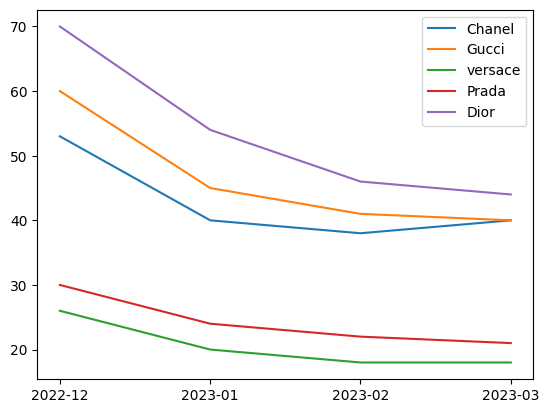

In [217]:
import matplotlib.pyplot as plt

plt.plot(df_search_2['month_year'], df_search_2['Chanel: (Worldwide)'], label='Chanel')
plt.plot(df_search_2['month_year'], df_search_2['Gucci: (Worldwide)'], label='Gucci')
plt.plot(df_search_2['month_year'], df_search_2['versace: (Worldwide)'], label='versace')
plt.plot(df_search_2['month_year'], df_search_2['Prada: (Worldwide)'], label='Prada')
plt.plot(df_search_2['month_year'], df_search_2['Dior: (Worldwide)'], label='Dior')

plt.legend()
plt.show()

In [148]:
data_statista = {
    'value in million USD': [37.887, 10.534, 53.021, 5.642, 3.165],
    'Column 2': ['GUCCI', 'DIOR', 'CHANEL', 'PRADA', 'VERSACE'],
    'year': [2022, 2022, 2022, 2022, 2022]
}

df_value = pd.DataFrame(data_statista)

In [149]:
df_value


,value in million USD,Column 2,year
0,37.887,GUCCI,2022
1,10.534,DIOR,2022
2,53.021,CHANEL,2022
3,5.642,PRADA,2022
4,3.165,VERSACE,2022


In [152]:
df_value_max = df_value.sort_values(by='value in million USD', ascending=False)
df_value_max.head(1)


,value in million USD,Column 2,year
2,53.021,CHANEL,2022
